# 🐚 Dataset: Abalone

- **Context**: Predict the age (rings) of abalones from physical measurements.
- **Size**: 4,177 observations, 8 input variables + 1 output variable[24x7offshoring.com+13machinelearningmastery.com+13reddit.com+13](https://machinelearningmastery.com/standard-machine-learning-datasets/?utm_source=chatgpt.com).
- **Columns**:
    1. Sex (M, F, I)
    2. Length
    3. Diameter
    4. Height
    5. Whole weight
    6. Shucked weight
    7. Viscera weight
    8. Shell weight
    9. Rings (output)

In [1]:
import pandas as pd

## 1. Basic Loading & Exploration

##### Load the dataset (e.g., abalone.csv) into a DataFrame.

In [2]:
df = pd.read_csv('./dataset/abalone.csv')

##### Display the first 10 rows.

In [3]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


##### Show column data types

In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

##### Check for missing values.

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##### Report the dataset shape (rows × columns).

In [6]:
df.shape

(4177, 9)

##### Provide summary statistics (min, max, mean, etc.) of numeric columns.

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 2. Data Cleaning & Transformation

##### Convert the categorical "Sex" column into dummy variables (one-hot).

In [8]:
# df = pd.get_dummies(df,columns=['Sex'],prefix='Sex',drop_first=True)
df = pd.get_dummies(df,columns=['Sex'],prefix='Sex')

df.drop(columns=["Sex_I"],inplace=True)

##### Identify and handle outliers in 'Height' beyond the 1st and 99th percentile.

In [9]:
lower_bound = df['Height'].quantile(0.01)
upper_bound = df['Height'].quantile(0.99)

In [10]:
lower_bound,upper_bound,df['Height'].min(),df['Height'].max(),df['Height'].median()

(0.045, 0.22, 0.0, 1.13, 0.14)

In [11]:
df_no_outliers = df[(df['Height'] >= lower_bound) & (df['Height']<=upper_bound)]

print("1st percentile (lower bound) : ",lower_bound)
print("\n99th percentile (lower bound) : ",upper_bound)
print("\n Data after removing outliers : \n",df_no_outliers)


1st percentile (lower bound) :  0.045

99th percentile (lower bound) :  0.22

 Data after removing outliers : 
       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0

##### Create a new column Age = Rings + 1.5 (approximate age).

In [12]:
df['Age'] = df['Rings'] + 1.5

##### Drop the original ‘Rings’ column and verify the transformation.

In [13]:
df.drop('Rings',axis=1,inplace=True)

## 3. Selection & Filtering

##### Select columns: 'Length', 'Diameter', 'Height', 'Whole weight', 'Age'.

In [14]:
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Age']]

,Length,Diameter,Height,Whole weight,Age
0,0.455,0.365,0.095,0.5140,16.5
1,0.350,0.265,0.090,0.2255,8.5
2,0.530,0.420,0.135,0.6770,10.5
3,0.440,0.365,0.125,0.5160,11.5
4,0.330,0.255,0.080,0.2050,8.5
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,12.5
4173,0.590,0.440,0.135,0.9660,11.5
4174,0.600,0.475,0.205,1.1760,10.5
4175,0.625,0.485,0.150,1.0945,11.5


##### Filter rows where Age > 10.

In [15]:
df[df['Age']>10]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1,16.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1,11.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1,0,17.5
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,11.5


##### Filter abalones with Sex == 'I' and Whole weight > 1.0.

In [16]:
df[(df['Sex_F'] == 0) & (df['Sex_M'] == 0) & (df['Whole weight'] > 1.0)]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age
510,0.680,0.530,0.185,1.1095,0.4390,0.2450,0.3400,0,0,11.5
550,0.650,0.515,0.160,1.1625,0.4950,0.2030,0.3300,0,0,18.5
598,0.605,0.495,0.145,1.0540,0.3690,0.2255,0.3600,0,0,13.5
641,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900,0,0,14.5
658,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0,0,19.5
660,0.650,0.525,0.180,1.6260,0.5970,0.3445,0.5300,0,0,19.5
1184,0.665,0.500,0.170,1.2975,0.6035,0.2910,0.3595,0,0,10.5
1342,0.585,0.475,0.160,1.0505,0.4800,0.2340,0.2850,0,0,11.5
1354,0.600,0.475,0.150,1.1200,0.5650,0.2465,0.2700,0,0,11.5
1358,0.605,0.485,0.150,1.2380,0.6315,0.2260,0.3300,0,0,12.5


##### Combine filters: Age > 10 and Shell weight < 0.5

In [17]:
df[(df['Age'] > 10) & (df['Shell weight'] < 0.5)]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1,16.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1,11.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1,0,17.5
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,11.5


## 4. Aggregation & Grouping

##### Group by Sex and compute the average Age.

In [18]:
def get_sex(row):
    if row['Sex_M'] == 1:
        return "M"
    elif row['Sex_F'] == 1:
        return "F"
    else: 
        return "I"

df['Sex'] = df.apply(get_sex,axis=1)

In [19]:
df.groupby('Sex')['Age'].mean()

Sex
F    12.629304
I     9.390462
M    12.205497
Name: Age, dtype: float64

##### Count instances per sex category.

In [20]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

##### For each sex, calculate mean and std of Whole weight.

In [21]:
df.groupby('Sex')['Whole weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,1.046532,0.430316,0.0800,0.730000,1.03850,1.320250,2.6570
I,1342.0,0.431363,0.286275,0.0020,0.205500,0.38400,0.599375,2.0495
M,1528.0,0.991459,0.470581,0.0155,0.671625,0.97575,1.265625,2.8255


##### Group by Sex and Age > 10 (boolean) to get counts.

In [22]:
df['Age_gt_10'] = df['Age'] > 10

In [23]:
df['Age_gt_10']

0        True
1       False
2        True
3        True
4       False
        ...  
4172     True
4173     True
4174     True
4175     True
4176     True
Name: Age_gt_10, Length: 4177, dtype: bool

In [24]:
df_ = df.groupby(['Sex','Age_gt_10']).size().reset_index(name='Count')

In [25]:
df_[df_['Age_gt_10'] == True]

,Sex,Age_gt_10,Count
1,F,True,1121
3,I,True,420
5,M,True,1229


## 5. Correlations & Relationships

##### Compute correlation matrix among numeric features.

In [26]:
correlation_matrix = df.corr()
correlation_matrix['Age']

/var/folders/pr/6264cydn30527m2bf6lwj2xr0000gn/T/ipykernel_99505/865832840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Sex_F             0.250279
Sex_M             0.181831
Age               1.000000
Age_gt_10         0.674178
Name: Age, dtype: float64

##### Identify which weight column has the strongest correlation with Age.

From the above table, we can say that the Shell weight is strongly correlated with Age

##### Plot scatter of Shell weight vs. Age, and compute correlation coefficient.

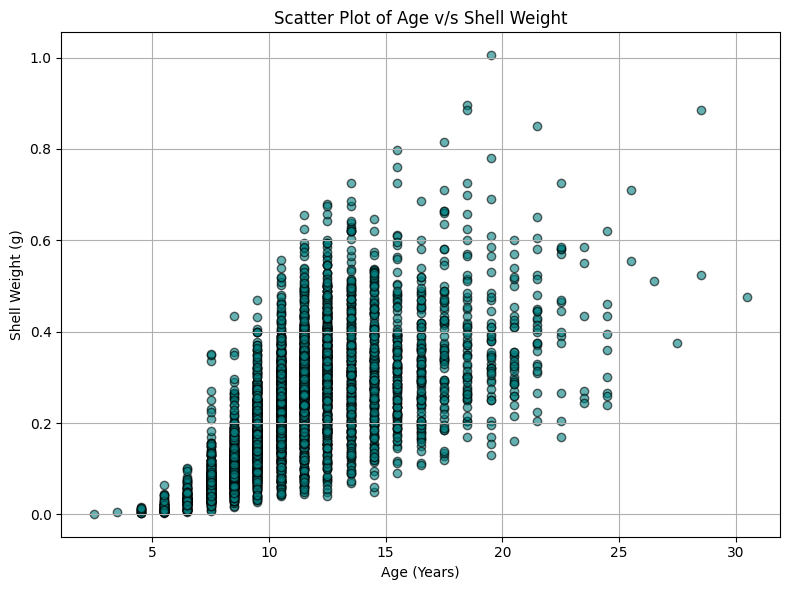

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df['Age'],df['Shell weight'],alpha=0.6,color='teal',edgecolor='k')
plt.title('Scatter Plot of Age v/s Shell Weight')
plt.xlabel('Age (Years)')
plt.ylabel('Shell Weight (g)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Feature Engineering & Binning

##### Bin Age into categories: young (<10), middle (10–15), old (>15).

In [28]:
bins = [0,10,15,df['Age'].max()]
labels = ['young','middle','old']

df['Age_category'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)

In [29]:
df['Age_category']

0          old
1        young
2       middle
3       middle
4        young
         ...  
4172    middle
4173    middle
4174    middle
4175    middle
4176    middle
Name: Age_category, Length: 4177, dtype: category
Categories (3, object): ['young' < 'middle' < 'old']

In [30]:
df[['Age', 'Age_category']].head(10)

,Age,Age_category
0,16.5,old
1,8.5,young
2,10.5,middle
3,11.5,middle
4,8.5,young
5,9.5,young
6,21.5,old
7,17.5,old
8,10.5,middle
9,20.5,old


##### Add column Size = Whole weight / Shell weight.

In [31]:
df['Size'] = df['Whole weight'] / df['Shell weight']
df[['Size','Whole weight','Shell weight']]

,Size,Whole weight,Shell weight
0,3.426667,0.5140,0.1500
1,3.221429,0.2255,0.0700
2,3.223810,0.6770,0.2100
3,3.329032,0.5160,0.1550
4,3.727273,0.2050,0.0550
...,...,...,...
4172,3.562249,0.8870,0.2490
4173,3.708253,0.9660,0.2605
4174,3.818182,1.1760,0.3080
4175,3.697635,1.0945,0.2960


In [32]:
df.groupby('Age_category')['Size'].mean()

Age_category
young     3.498639
middle    3.508246
old       3.174292
Name: Size, dtype: float64

## 7. Sorting & Indexing

##### Sort by Age descending, display top 5 oldest abalones.

In [33]:
df.sort_values(by='Age',ascending=False).head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age,Sex,Age_gt_10,Age_category,Size
480,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,1,0,30.5,F,True,NaN,3.805263
2209,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,1,0,28.5,F,True,old,2.309524
2108,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,0,1,28.5,M,True,old,2.467232
294,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,0,1,27.5,M,True,old,2.820000
2201,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510,1,0,26.5,F,True,old,2.756863
3149,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.710,1,0,25.5,F,True,old,2.785915
3280,0.690,0.540,0.185,1.6195,0.5330,0.3530,0.555,0,1,25.5,M,True,old,2.918018
314,0.630,0.485,0.175,1.3000,0.4335,0.2945,0.460,0,1,24.5,M,True,old,2.826087
313,0.620,0.470,0.200,1.2255,0.3810,0.2700,0.435,1,0,24.5,F,True,old,2.817241
2305,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,1,0,24.5,F,True,old,2.980769


##### Sort by Whole weight ascending, show those with smallest weight.

In [34]:
df.sort_values(by='Whole weight',ascending=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age,Sex,Age_gt_10,Age_category,Size
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,0,0,2.5,I,False,young,1.333333
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,0,0,4.5,I,False,young,2.666667
2114,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,0,0,5.5,I,False,young,3.000000
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,0,0,4.5,I,False,young,3.250000
1429,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,0,0,4.5,I,False,young,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,0,1,15.5,M,True,old,3.517241
1051,0.735,0.600,0.220,2.5550,1.1335,0.4400,0.6000,1,0,12.5,F,True,middle,4.258333
1209,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,1,0,12.5,F,True,middle,4.534130
1763,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,0,1,13.5,M,True,middle,4.808824


##### Reset the index after sorting and show first 5 rows.

In [35]:
df.reset_index().head(5)

,index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M,Age,Sex,Age_gt_10,Age_category,Size
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1,16.5,M,True,old,3.426667
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,8.5,M,False,young,3.221429
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,10.5,F,True,middle,3.223810
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,11.5,M,True,middle,3.329032
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,8.5,I,False,young,3.727273


## 8. Pivot Tables & Crosstabs

##### Create a pivot table: average Whole weight with Sex vs. Age bins.

In [36]:
pivot = df.pivot_table(values='Whole weight',
                      index = 'Sex',
                      columns = 'Age_category',
                      aggfunc = 'mean')

In [37]:
pivot

Age_category,young,middle,old
Sex,,,
F,0.724626,1.082047,1.170748
I,0.314547,0.665969,0.856990
M,0.613905,1.065661,1.162951


##### Generate a crosstab counting rows by Sex and Age category.

In [38]:
pd.crosstab(index=[df['Sex'],df['Age_category']],columns='count')

col_0             count
Sex Age_category       
F   young           186
    middle          902
    old             218
I   young           922
    middle          372
    old              48
M   young           299
    middle         1006
    old             223

In [39]:
pd.crosstab(index = df['Sex'],columns = df['Age_category'])

Age_category,young,middle,old
Sex,,,
F,186,902,218
I,922,372,48
M,299,1006,223


## 9. Advanced: Rolling & Window Functions

##### Sort data by Age, then compute a 50-row rolling mean of Whole weight.

In [40]:
df_rolling_mean = df.sort_values(by='Age')['Whole weight'].rolling(window=50).mean()

##### Add new column Rolling_Wt50 with that result.

In [41]:
df['Rolling_Wt50'] = df_rolling_mean

##### Plot Age vs. Rolling_Wt50

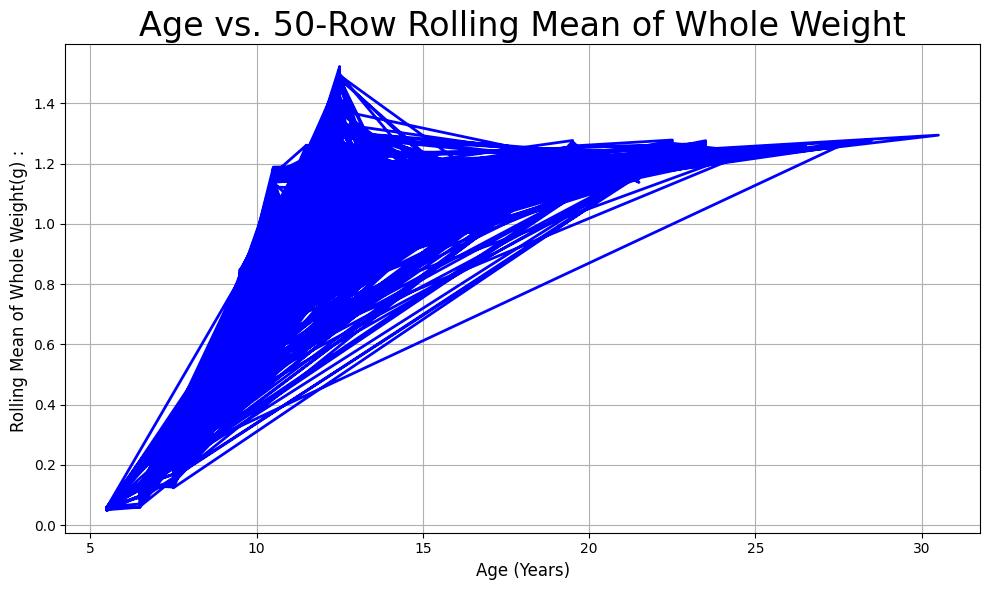

In [42]:
plt.figure(figsize = (10,6))

plt.plot(df['Age'],df['Rolling_Wt50'],color='blue',linewidth=2)

plt.title('Age vs. 50-Row Rolling Mean of Whole Weight',fontsize=24)
plt.xlabel('Age (Years)',fontsize=12)
plt.ylabel('Rolling Mean of Whole Weight(g) : ',fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

## 10. Exporting Results

##### Save the cleaned DataFrame to abalone_cleaned.csv.

In [43]:
df.to_csv('abalone_cleaned.csv',index=False)

##### Export a summary grouped by Sex to abalone_summary_by_sex.csv.

In [44]:
summary_by_sex = df.groupby('Sex').mean(numeric_only=True)

summary_by_sex.to_csv('abalone_summary_by_sex.csv')